In [1]:
from __future__ import division
import pandas as pd
import numpy as np
from os.path import join
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn
import csv
from random import randrange

In [3]:
def look_at_framewise_entropy_through_time(fileNum, chromatype='Deep'):
    framewiseEntropies = read_framewise_entropies('Experiments/'+chromatype+'Chroma/Isophonics', 'IsophonicsChords2010')
    X = framewiseEntropies.iloc[fileNum][pd.notna(framewiseEntropies.iloc[fileNum])]
    plt.figure(figsize=(10,5))
    plt.title('Entropy for file number ' + str(fileNum+1) + ' using ' + chromatype + ' chroma')
    plt.plot(X)
    plt.ylabel('Entropy increase', fontsize=18)
    plt.xlabel('Frame number', fontsize=18)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    print('Max entropy val:', max(X))
    
def look_at_all_framewise_entropy_through_time(fileNum):
    hfont = {'fontname':'Times', 'fontsize':24}
    colors=['k', 'g', 'b']
    plt.figure(figsize=(10,5))
    plt.ylabel('Entropy increase', **hfont)
    plt.xlabel('Frame number', **hfont)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    for i,chroma_type in enumerate(['Deep', 'CLP', 'CENS']):
        framewiseEntropies = read_framewise_entropies('Experiments/'+chroma_type+'Chroma/Isophonics', 'IsophonicsChords2010')
        X = framewiseEntropies.iloc[fileNum][pd.notna(framewiseEntropies.iloc[fileNum])]
        plt.plot(X, color=colors[i])
    leg = plt.legend(['Deep Chroma', 'CLP Chroma', 'CENS Chroma'], fontsize=18, loc=4)
    # set the linewidth of each legend object
    for legobj in leg.legendHandles:
        legobj.set_linewidth(3.0)
    
def look_at_sequential_entropy_through_time(fileNum, chromatype='Deep'):
    sequentialEntropies = read_sequential_entropies('Experiments/'+chromatype+'Chroma/Isophonics', 'IsophonicsChords2010')
    X = np.diff(sequentialEntropies.iloc[fileNum][pd.notna(sequentialEntropies.iloc[fileNum])])
    plt.figure(figsize=(10,5))
    plt.title('Lattice entropy for file number ' + str(fileNum+1) + ' using ' + chromatype + ' chroma')
    plt.plot(X)
    plt.ylabel('Entropy increase', fontsize=18)
    plt.xlabel('Frame number', fontsize=18)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    print('Max entropy val:', max(X))

def read_framewise_entropies(basedir, list_name):
    framewise_entropies = pd.read_csv(join(basedir, 'HMMChords-decodeMAP_with_framewise_entropy-0.1Ps', list_name+'-entropies.csv'), header=None)
    return framewise_entropies

def read_sequential_entropies(basedir, list_name):
    sequential_entropies = pd.read_csv(join(basedir, 'HMMChords-decodeMAP_with_sequential_entropy-0.1Ps', list_name+'-entropies.csv'), header=None)
    return sequential_entropies

def read_framewise_entropies_stats(basedir, list_name):
     chord_score = pd.read_csv(join(basedir, 'HMMChords-decodeMAP_with_framewise_entropy-0.1Ps', list_name+'-ResultsMirex.csv'), skiprows=2, usecols=[0,1,2], names=['File', 'MAP score', 'Duration'])
     return read_entropy_stats(join(basedir, 'HMMChords-decodeMAP_with_framewise_entropy-0.1Ps', list_name+'-entropies.csv'), list_name, chord_score)

def read_sequential_entropies_stats(basedir, list_name):
    chord_score = pd.read_csv(join(basedir, 'HMMChords-decodeMAP_with_sequential_entropy-0.1Ps', list_name+'-ResultsMirex.csv'), skiprows=2, usecols=[0,1,2], names=['File', 'MAP score', 'Duration'])
    return read_entropy_stats(join(basedir, 'HMMChords-decodeMAP_with_sequential_entropy-0.1Ps', list_name+'-entropies.csv'), list_name, chord_score, sequential=True)

def read_entropy_stats(dir_name, list_name, chord_score, sequential=False):
    entropies = pd.read_csv(join(dir_name), header=None)
    entropy_stats = pd.DataFrame(columns=['Mean entropy', 'Median entropy', 'Entropy std'])
    mean, median, std = [],[],[]
    for row in range(entropies.shape[0]):
        entropy_row = entropies.iloc[row][pd.notna(entropies.iloc[row])]
        if sequential:
            entropy_row = np.diff(entropy_row)
        mean.append(np.mean(entropy_row))
        median.append(np.median(entropy_row))
        std.append(np.std(entropy_row))
    entropy_stats = pd.DataFrame({'Mean entropy':mean, 'Median entropy':median, 'Entropy std':std})
    return pd.concat([chord_score, entropy_stats], axis=1)


<b>Songs where you can see drums coming in and worsening performance on CLP where DeepChroma is unaffected.
    - Who wants to live forever - fileNum = 196
    - Golden Slumbers - fileNum = 164
   

Max entropy val: 5.5781373988938965
Max entropy val: 5.584962500721155
Max entropy val: 5.581295660311928


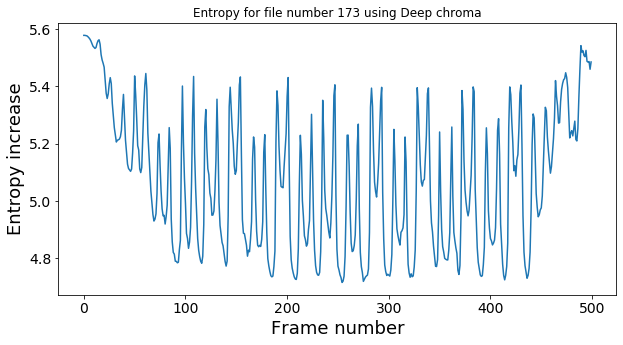

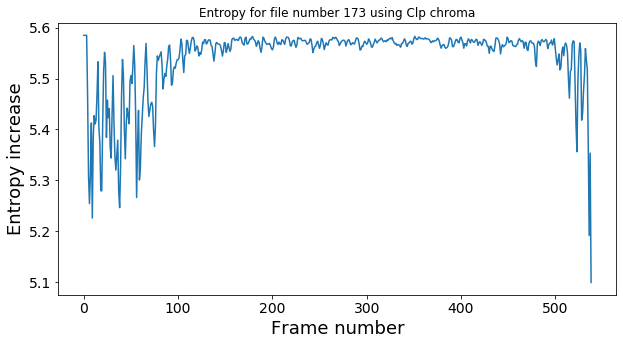

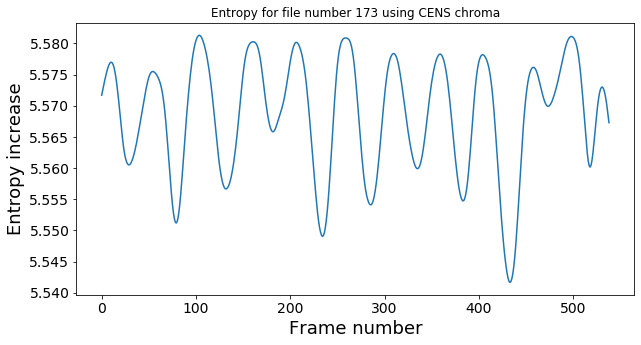

In [4]:
#fileNum = randrange(217)
fileNum = 172
look_at_framewise_entropy_through_time(fileNum, 'Deep')
look_at_framewise_entropy_through_time(fileNum, 'Clp')
look_at_framewise_entropy_through_time(fileNum, 'CENS')

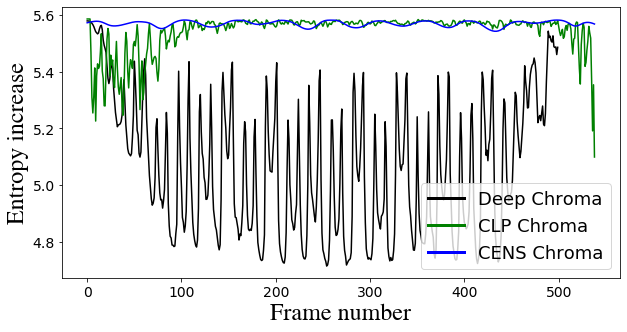

In [5]:
look_at_all_framewise_entropy_through_time(fileNum=172)
# look_at_all_framewise_entropy_through_time(fileNum=11)

Text(0.5, 1.0, 'MAP score against Lattice Entropy')

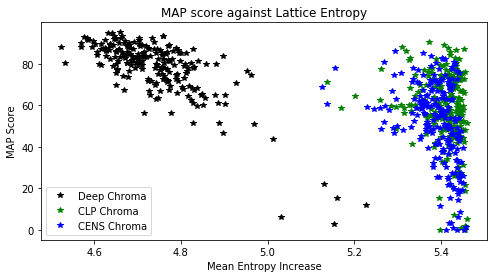

In [6]:
deep_seq_ent = read_sequential_entropies_stats('Experiments/DeepChroma/Isophonics', 'IsophonicsChords2010')
clp_seq_ent = read_sequential_entropies_stats('Experiments/CLPChroma/Isophonics', 'IsophonicsChords2010')
cens_seq_ent = read_sequential_entropies_stats('Experiments/CENSChroma/Isophonics', 'IsophonicsChords2010')
plt.figure(figsize=(8,4))
plt.plot(deep_seq_ent['Mean entropy'], deep_seq_ent['MAP score'], linestyle='None', marker='*', markersize=6, color='k')
plt.plot(clp_seq_ent['Mean entropy'], clp_seq_ent['MAP score'], linestyle='None', marker='*', markersize=6, color='g')
plt.plot(cens_seq_ent['Mean entropy'], cens_seq_ent['MAP score'], linestyle='None', marker='*', markersize=6, color='b')
plt.title('Deep chroma: MAP Score against mean of entropy increase throughout the song')
plt.xlabel('Mean Entropy Increase')
plt.ylabel('MAP Score')
plt.legend(['Deep Chroma', 'CLP Chroma', 'CENS Chroma'])
plt.title('MAP score against Lattice Entropy')

# Frame Obs Entropy

Text(0, 0.5, 'Chord Score')

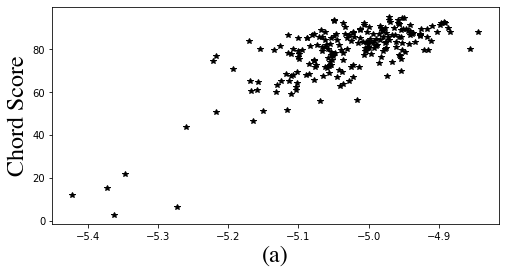

In [7]:
hfont = {'fontname':'Times', 'fontsize':24}

deep_frame_ent = read_framewise_entropies_stats('Experiments/DeepChroma/Isophonics', 'IsophonicsChords2010')
clp_frame_ent = read_framewise_entropies_stats('Experiments/CLPChroma/Isophonics', 'IsophonicsChords2010')
cens_frame_ent = read_framewise_entropies_stats('Experiments/CENSChroma/Isophonics', 'IsophonicsChords2010')
plt.figure(figsize=(8,4))
plt.plot(-deep_frame_ent['Mean entropy'], deep_frame_ent['MAP score'], linestyle='None', marker='*', markersize=6, color='k')
plt.rcParams.update({'font.size': 12})
plt.xlabel('(a)', **hfont)
plt.ylabel('Chord Score', **hfont)

Text(0, 0.5, 'Chord Score')

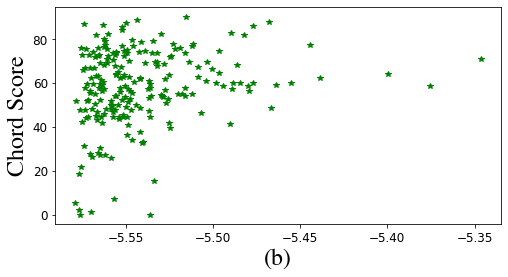

In [8]:
plt.figure(figsize=(8,4))
plt.plot(-clp_frame_ent['Mean entropy'], clp_frame_ent['MAP score'], linestyle='None', marker='*', markersize=6, color='g')
plt.rcParams.update({'font.size': 12})
plt.xlabel('(b)', **hfont)
plt.ylabel('Chord Score', **hfont)

Text(0, 0.5, 'Chord Score')

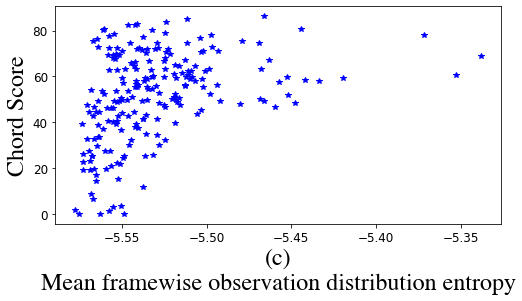

In [9]:
plt.figure(figsize=(8,4))
plt.plot(-cens_frame_ent['Mean entropy'], cens_frame_ent['MAP score'], linestyle='None', marker='*', markersize=6, color='b')
plt.rcParams.update({'font.size': 12})
plt.xlabel('(c)\nMean framewise observation distribution entropy', **hfont)
plt.ylabel('Chord Score', **hfont)

# Same thing for lattice entropy

Text(0, 0.5, 'Chord Score')

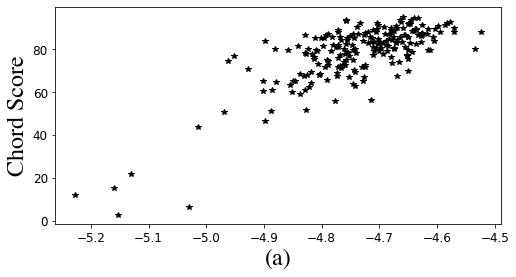

In [10]:
plt.figure(figsize=(8,4))
plt.plot(-deep_seq_ent['Mean entropy'], deep_seq_ent['MAP score'], linestyle='None', marker='*', markersize=6, color='k')
plt.rcParams.update({'font.size': 12})
plt.xlabel('(a)', **hfont)
plt.ylabel('Chord Score', **hfont)

Text(0, 0.5, 'Chord Score')

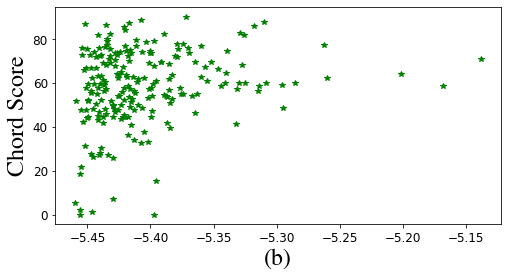

In [11]:
plt.figure(figsize=(8,4))
plt.plot(-clp_seq_ent['Mean entropy'], clp_seq_ent['MAP score'], linestyle='None', marker='*', markersize=6, color='g')
plt.rcParams.update({'font.size': 12})
plt.xlabel('(b)', **hfont)
plt.ylabel('Chord Score', **hfont)

Text(0, 0.5, 'Chord Score')

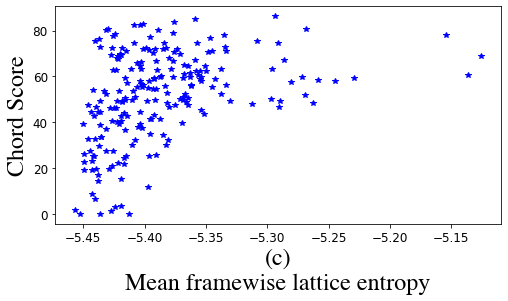

In [12]:
plt.figure(figsize=(8,4))
plt.plot(-cens_seq_ent['Mean entropy'], cens_seq_ent['MAP score'], linestyle='None', marker='*', markersize=6, color='b')
plt.rcParams.update({'font.size': 12})
plt.xlabel('(c)\nMean framewise lattice entropy', **hfont)
plt.ylabel('Chord Score', **hfont)

# Same thing for RWC dataset

Text(0, 0.5, 'Chord Score')

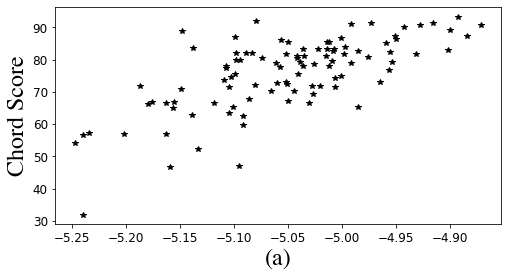

In [13]:
hfont = {'fontname':'Times', 'fontsize':24}

rwc_deep_frame_ent = read_framewise_entropies_stats('Experiments/DeepChroma/RWC-Popular', 'RWC-Popular')
rwc_clp_frame_ent = read_framewise_entropies_stats('Experiments/CLPChroma/RWC-Popular', 'RWC-Popular')
rwc_cens_frame_ent = read_framewise_entropies_stats('Experiments/CENSChroma/RWC-Popular', 'RWC-Popular')
plt.figure(figsize=(8,4))
plt.plot(-rwc_deep_frame_ent['Mean entropy'], rwc_deep_frame_ent['MAP score'], linestyle='None', marker='*', markersize=6, color='k')
plt.rcParams.update({'font.size': 12})
plt.xlabel('(a)', **hfont)
plt.ylabel('Chord Score', **hfont)

Text(0, 0.5, 'Chord Score')

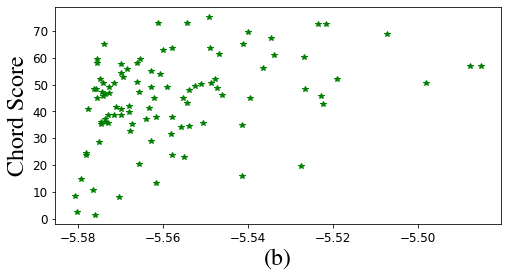

In [14]:
plt.figure(figsize=(8,4))
plt.plot(-rwc_clp_frame_ent['Mean entropy'], rwc_clp_frame_ent['MAP score'], linestyle='None', marker='*', markersize=6, color='g')
plt.rcParams.update({'font.size': 12})
plt.xlabel('(b)', **hfont)
plt.ylabel('Chord Score', **hfont)

Text(0, 0.5, 'Chord Score')

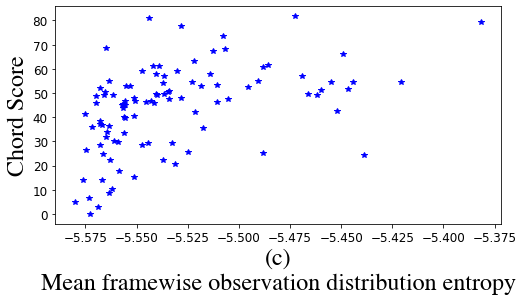

In [15]:
plt.figure(figsize=(8,4))
plt.plot(-rwc_cens_frame_ent['Mean entropy'], rwc_cens_frame_ent['MAP score'], linestyle='None', marker='*', markersize=6, color='b')
plt.rcParams.update({'font.size': 12})
plt.xlabel('(c)\nMean framewise observation distribution entropy', **hfont)
plt.ylabel('Chord Score', **hfont)

# Confidence Filtering

<b> TODO: Create dataframe of [ MAP Score | Duration | Confidence ] for Deep/CLP/CENS
    
    Then do the below filtering steps

In [16]:
import matplotlib.lines as mlines

def read_chord_scores_and_confidences(basedir, list_name, hmm_self_prob):
    chord_score = pd.read_csv(join(basedir, 'HMMChords-decode_with_PPD-{}Ps'.format(round(hmm_self_prob,3)), list_name+'-ResultsMirex.csv'), skiprows=2, usecols=[0,1,2], names=['File', 'MAP score', 'Duration'])
    opc_confidences = pd.read_csv(join(basedir, 'HMMChords-decodeMAP_with_medianOPC-{}Ps'.format(round(hmm_self_prob,3)), list_name+'-logprobs_confidences.csv'), header=None, names=['Median OPC confidence'], usecols=[1], squeeze=True)
    ppd_confidences = pd.read_csv(join(basedir, 'HMMChords-decode_with_PPD-{}Ps'.format(round(hmm_self_prob,3)), list_name+'-logprobs_confidences.csv'), header=None, names=['PPD confidence'], usecols=[1], squeeze=True)
    
    framewise_entropies = read_framewise_entropies(basedir, list_name);
    mean_entropies=[]
    for fileNum in range(framewise_entropies.shape[0]):
        X = framewise_entropies.iloc[fileNum][pd.notna(framewise_entropies.iloc[fileNum])]
        mean_entropies += [-np.mean(X)]

    return pd.concat([chord_score, opc_confidences, ppd_confidences, pd.DataFrame({'Mean entropy':mean_entropies})], axis=1)


def weighted_average(dataframe, value_column, weights_column):
    return sum(dataframe[value_column] * dataframe[weights_column]) / sum(dataframe[weights_column])

def confidence_filter(data, confidence_measure, score_measure, num_cutoffs=50):
    cutoffs = np.linspace(np.min(data[confidence_measure]), np.max(data[confidence_measure]), num=num_cutoffs)
    filtered_scores = []
    counts = []
    for cutoff in cutoffs:
        filtered = data[data[confidence_measure] >= cutoff]
        filtered_weighted_average = weighted_average(filtered, score_measure, 'Duration')
        filtered_scores.append(filtered_weighted_average)
        counts.append(len(filtered))
    return cutoffs, counts, filtered_scores

def apply_confidence_filter(results, conf_filters=['Mean entropy']):
    confidence_measures = conf_filters
    score_measure = 'MAP score'
    cutoffs = []
    counts = []
    scores = []
    for i, result in enumerate(results):
        for conf in confidence_measures:
#             if (i==1 or conf=='PPD confidence'):
            filter_cutoffs, filtered_counts, filtered_scores = confidence_filter(result, conf, score_measure)
            cutoffs.append(filter_cutoffs)
            counts.append(filtered_counts)
            scores.append(filtered_scores)
    return cutoffs, counts, scores

def plot_confidence_filter(filtered_results, dataset_name, filter_type='entropy'):
    markers=['*', 'x', 'o', '+']
    colors=['k', 'g', 'b', 'c']
    cutoffs, counts, scores = filtered_results
    fig, ax1 = plt.subplots(1, 1, figsize=(8.4, 4.8))
    ax2 = ax1.twinx()
    for i in range(len(cutoffs)):
        ax1.plot(np.linspace(0, 1, num=len(scores[i])), scores[i], ls="--", marker=markers[i], markersize=10, color=colors[i])
        ax1.set_ylabel('Chord score', fontsize=12)
        ax1.set_xlabel('Relative confidence cutoff', fontsize=12)
        ax2.plot(np.linspace(0, 1, num=len(counts[i])), counts[i], color=colors[i])
        ax2.set_ylabel('Filtered dataset size', fontsize=12)
    DeepChroma = mlines.Line2D([], [], color='k', marker='*', markersize=15, label='DeepChroma '+filter_type)
    CLPChroma = mlines.Line2D([], [], color='g', marker='x', markersize=15, label='CLP '+filter_type)
#     CLPChromaPPD = mlines.Line2D([], [], color='b', marker='o', markersize=15, label='CLP PPD')
    CENSChroma = mlines.Line2D([], [], color='b', marker='o', markersize=15, label='CENS '+filter_type)
    plt.legend(bbox_to_anchor=(0., -0.25, 1., .102),
               ncol=4, mode="expand", borderaxespad=0., fontsize=12, handles=[DeepChroma, CLPChroma, CENSChroma])
    plt.tight_layout()
    plt.title('Confidence measure filtering on the {} dataset'.format(dataset_name), fontsize=14)



In [17]:
clp_isophonics = read_chord_scores_and_confidences('Experiments/CLPChroma/Isophonics', 'IsophonicsChords2010', 0.1)
deep_isophonics = read_chord_scores_and_confidences('Experiments/DeepChroma/Isophonics', 'IsophonicsChords2010', 0.1)
cens_isophonics = read_chord_scores_and_confidences('Experiments/CENSChroma/Isophonics', 'IsophonicsChords2010', 0.1)

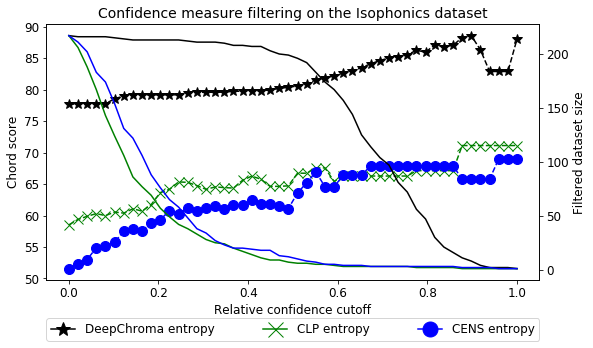

In [18]:
plot_confidence_filter(apply_confidence_filter([deep_isophonics, clp_isophonics, cens_isophonics]), 'Isophonics')

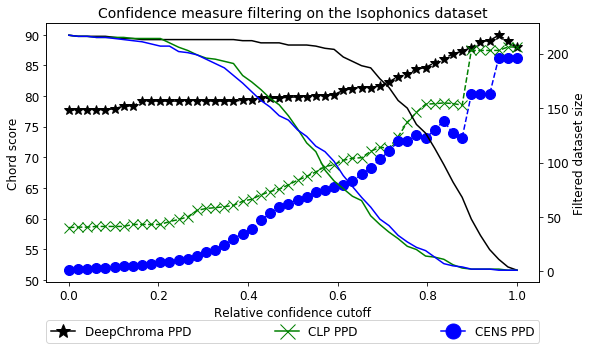

In [19]:
plot_confidence_filter(apply_confidence_filter([deep_isophonics, clp_isophonics, cens_isophonics], conf_filters=['PPD confidence']), 'Isophonics', filter_type='PPD')

In [20]:
clp_rwcpop = read_chord_scores_and_confidences('Experiments/CLPChroma/RWC-Popular', 'RWC-Popular', 0.1)
deep_rwcpop = read_chord_scores_and_confidences('Experiments/DeepChroma/RWC-Popular', 'RWC-Popular', 0.1)
cens_rwc_pop = read_chord_scores_and_confidences('Experiments/CENSChroma/RWC-Popular', 'RWC-Popular', 0.1)

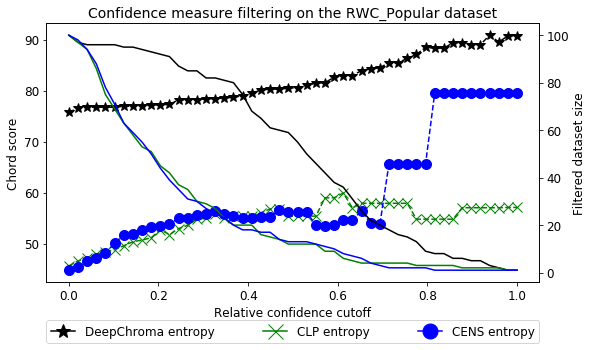

In [21]:
plot_confidence_filter(apply_confidence_filter([deep_rwcpop, clp_rwcpop, cens_rwc_pop], conf_filters=['Mean entropy']), 'RWC_Popular', filter_type='entropy')


# Energy Analysis

In [22]:
def look_at_framewise_entropies_and_energies(list_name, chroma_type):
    basedir = join('Experiments', chroma_type, 'Isophonics')
    energies = []
    entropies = []
    framewise_energies = pd.read_csv(join(basedir, 'HMMChords-decodeMAP_with_framewise_entropy-{}Ps'.format(round(0.1,3)), list_name+'-rms_energies.csv'))
    framewise_entropies = read_framewise_entropies('Experiments/'+chroma_type+'/Isophonics', 'IsophonicsChords2010')
    for fileNum in range(framewise_energies.shape[0]):
        framewise_entropies_file = framewise_entropies.iloc[fileNum][pd.notna(framewise_entropies.iloc[fileNum])]
        framewise_energies_file = framewise_energies.iloc[fileNum][pd.notna(framewise_energies.iloc[fileNum])]
        energies += list(np.asarray(framewise_energies_file))
        entropies += list(np.asarray(framewise_entropies_file))

    return energies, entropies

# Can something better be done to visualize?
# https://towardsdatascience.com/simple-and-multiple-linear-regression-with-python-c9ab422ec29c

Text(0.5, 0, 'Frame RMS Energy')

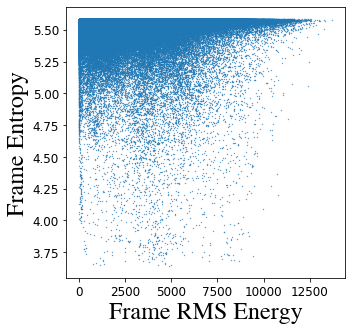

In [23]:
clp_energies, clp_entropies = look_at_framewise_entropies_and_energies('IsophonicsChords2010', 'CLPChroma')
plt.figure(figsize=(5,5))
plt.scatter(clp_energies[0:len(clp_entropies)], clp_entropies, s=0.1)
plt.ylabel('Frame Entropy', **hfont)
plt.xlabel('Frame RMS Energy', **hfont)

Text(0.5, 0, 'Frame RMS Energy')

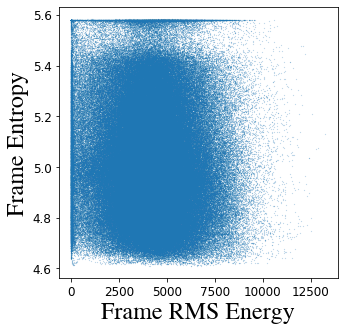

In [26]:
deep_energies, deep_entropies = look_at_framewise_entropies_and_energies('IsophonicsChords2010', 'DeepChroma')
plt.figure(figsize=(5,5))
plt.scatter(deep_energies[0:len(deep_entropies)], deep_entropies, s=0.01)
plt.ylabel('Frame Entropy', **hfont)
plt.xlabel('Frame RMS Energy', **hfont)

Text(0.5, 0, 'Frame RMS Energy')

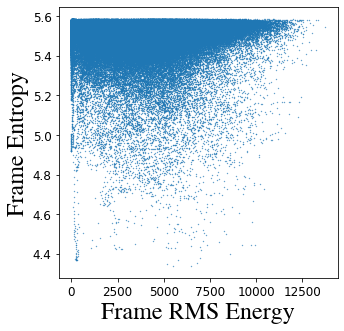

In [27]:
cens_energies, cens_entropies = look_at_framewise_entropies_and_energies('IsophonicsChords2010', 'CENSChroma')
plt.figure(figsize=(5,5))
plt.scatter(cens_energies[0:len(cens_entropies)], cens_entropies, s=0.1)
plt.ylabel('Frame Entropy', **hfont)
plt.xlabel('Frame RMS Energy', **hfont)

# Beats Analysis

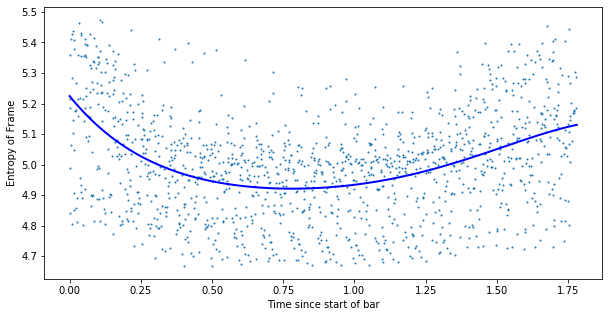

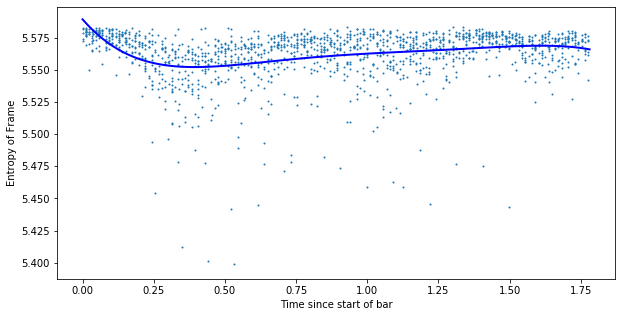

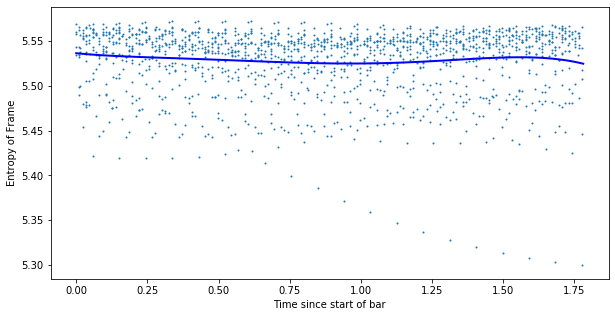

In [7]:
songList = []
list_name = 'IsophonicsChords2010'

with open(join('Lists',list_name+'Beats.lst')) as csvfile:
    rdr = csv.reader(csvfile)
    for row in rdr:
        songList += row


def plotEntropyVsTimeSinceFirstBeatForSong(song, songNum, chromadir,
                                           step_size=4410.0, block_size=8192.0,sample_rate=44100.0):
    #Get all the beat times for the song
    with open(join('Ground-Truth/Beats', song + '.txt')) as csvfile:
        rdr = csv.reader(csvfile)
        beat1Times = []
        beatTimes = []
        for row in rdr:
            if row[0].split()[1] == '1':
                beat1Times += [float(row[0].split()[0])]
            beatTimes += [float(row[0].split()[0])]
        beat1Times = np.asarray(beat1Times)
        beatTimes = np.asarray(beatTimes)

    avg_bar_length = np.mean(np.diff(beat1Times))

    #Open the numpy array of entropies vs frame number.
#     framewise_entropies = np.load(, allow_pickle=True)
    framewise_entropies = read_framewise_entropies(join(chromadir, 'Isophonics'), 'IsophonicsChords2010')

#     for entropySongNum,frame_entropies in enumerate(framewise_entropies['arr_0']):
    for entropySongNum in range(framewise_entropies.shape[0]):
        frame_entropies = framewise_entropies.iloc[entropySongNum][pd.notna(framewise_entropies.iloc[entropySongNum])]
        #Not all songs in the list have beat positions dangit.
        if (entropySongNum < 180 and entropySongNum == songNum) or (entropySongNum > 198 and entropySongNum == songNum+19): #Only look at the entropies for songs we have beat labels for
            timesSinceLastBeat = []

            #Create the timeSinceLastBeat array.
            for frameNum,frame in enumerate(frame_entropies):
                frameTime = ((frameNum * step_size) + (block_size/2))/sample_rate
                framesBeatsDiff = frameTime-beat1Times
                beatsPassed = len(np.where(framesBeatsDiff > 0)[0])
                timeSinceLastBeat = -1
                if beatsPassed > 0:
                    timeSinceLastBeat = framesBeatsDiff[beatsPassed-1]

                timesSinceLastBeat += [timeSinceLastBeat]

            df = pd.DataFrame(np.asarray(frame_entropies), columns=['Entropy'])
            df = pd.concat([df, pd.DataFrame(np.asarray(timesSinceLastBeat), columns=['Time Since First Beat'])], axis=1)

            #Only get the entropies for when there's a steady beat
            df.drop(df[df['Time Since First Beat'] > avg_bar_length].index, inplace=True)
            df.drop(df[df['Time Since First Beat'] < 0].index, inplace=True)

            #Plot the entire song
            plt.figure(figsize=(10,5))
            plt.scatter(df['Time Since First Beat'], df['Entropy'], s=1)
            plt.ylabel('Entropy of Frame')
            plt.xlabel('Time since start of bar')
            z = np.polyfit(df['Time Since First Beat'], df['Entropy'], 5)
            p = np.poly1d(z)
            xx = np.linspace(0, avg_bar_length, 100)
            plt.plot(xx, p(xx), '-', color='b', linewidth=2)
            break
            
songNum = 5
# Good examples: 1,5,7,8,9,30, 
# Good example: 13 shows the two types of bar. One which has a chord change in the middle, one which doesn't.
# chromadir = 'Experiments/DeepChroma'
# chromadir = 'Experiments/CLPChroma'
song = songList[songNum]
plotEntropyVsTimeSinceFirstBeatForSong(song, songNum, 'Experiments/DeepChroma')
plotEntropyVsTimeSinceFirstBeatForSong(song, songNum, 'Experiments/CLPChroma', step_size=4096.0)
plotEntropyVsTimeSinceFirstBeatForSong(song, songNum, 'Experiments/CENSChroma', step_size=4096.0)


#Can something more clever be done to visualize?
# https://towardsdatascience.com/simple-and-multiple-linear-regression-with-python-c9ab422ec29c

# So why is the CLP/CENS Chroma not performing great with the confidence measure whilst sometimes performing well on the chord estimation task?

The drums are throwing the confidence measure off for the CLP. I think it shows the need for the non-linear Maximum-Likelihood operation similar to how the Viterbi algorithm uses one. Just because there's lots of competing noise doesn't mean that the MOST-LIKELY chord state is going to be wrong. And this is also why the PPD method also performs better - Competing ML methods that give different most likely states.

The reason is may work better for the DeepChroma is that only the harmonic information is now present in the chromagrams, so when entropy is higher this means there is a high degree of uncertainty purely due to harmonic content.

# Chromagrams Analysis

In [22]:
from scipy.stats import entropy

hfont = {'fontname':'Times', 'fontsize':24}

def get_chord_scores(basedir, list_name):
    chord_score = pd.read_csv(join(basedir, 'HMMChords-decodeMAP_with_framewise_entropy-0.1Ps', list_name+'-ResultsMirex.csv'), skiprows=2, usecols=[0,1,2], names=['File', 'MAP score', 'Duration'])
    return chord_score

def AnalyseChromagrams(list_name, chroma_types, data_set):
    colors=['k', 'g', 'b']
    for typenum, chroma_type in enumerate(chroma_types):
        chordScores = get_chord_scores('Experiments/'+chroma_type+'/Isophonics', list_name)

        chromagram_list = np.load(join('Experiments', chroma_type, data_set, 'Chromagrams.npz'), allow_pickle=True)['arr_0']

        obs_entropy_stats = read_framewise_entropies_stats('Experiments/'+chroma_type+'/Isophonics', 'IsophonicsChords2010')

        #Calculate the average chromagram entropy per song.
        songsAverageEntropy = []
#         songsAverageEnergy = []
        for i,song in enumerate(chromagram_list):
            songAverageEntropy = 0.0
#             songAverageEnergy = 0.0
            for frame in song:
                songAverageEntropy += entropy(frame)
#                 songAverageEnergy += np.sqrt(np.mean(np.square(frame)))

            songAverageEntropy = songAverageEntropy / len(chromagram_list[i])
            songsAverageEntropy += [songAverageEntropy]

#             songAverageEnergy = songAverageEnergy / len(chromagram_list[i])
#             songsAverageEnergy += [songAverageEnergy]

#         fig, axs = plt.subplots(2,2, figsize=(8,8))
        plt.figure(figsize=(8,4))
        plt.scatter(songsAverageEntropy, chordScores['MAP score'], color=colors[typenum])
        plt.ylabel('Chord Score', **hfont)
        if typenum==0:
            plt.xlabel('(a)', **hfont)
        elif typenum==1:
            plt.xlabel('(b)', **hfont)
        else:
            plt.xlabel('(c)\nMean chroma entropy', **hfont)



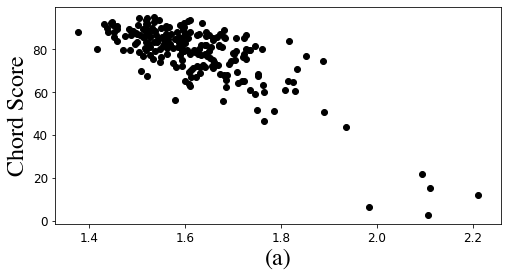

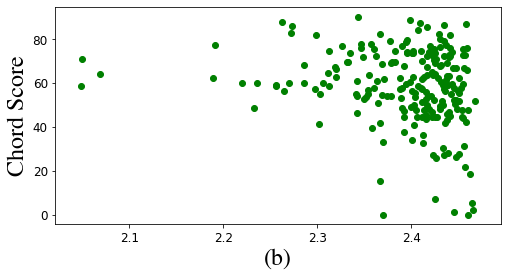

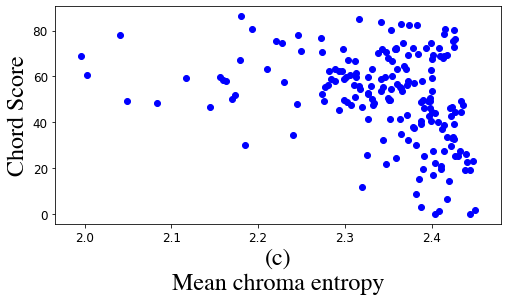

In [23]:
AnalyseChromagrams('IsophonicsChords2010', ['DeepChroma', 'CLPChroma', 'CENSChroma'], 'Isophonics')